In [2]:
## Run this cell to import the necessary libaries
import numpy as np
from scipy.special import softmax
import matplotlib.pyplot as plt

We are going to classify the iris dataset, RUN THE NEXT CELL WITHOUT MODIFICATIONS

In [42]:
### Loading and preprocessing the data, don't change


from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target
names = iris['target_names']
feature_names = iris['feature_names']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=0)

X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

COMPLETE THE CODE IN THE FOLLOWING CELL, THEN RUN IT

In [120]:
####COMPLETE THE FOLLOWING TWO FUNCTIONS
def Gradient(W, X_batch, t_batch):
    ### Complete this function to calculate the gradient of the cross entropy loss
    Y = softmax(W @ X_batch, axis = 0) #this is our model for the prediction 

    N = X_batch.shape[1] #number of points in batch
    K = W.shape[0] #number of classes
    M = W.shape[1] #number of features
    
    G = np.zeros((K, M)) #this will store the gradient, the dimensions are K: number of classes, M: number of features
    
    # calculate the gradient according to the formula in the exercises
    for j in range(K):
        diff_scaler = Y[j, :] - t_batch[j, :]
        diff_scaler_reshaped = diff_scaler.reshape(-1, 1)
        j_sum = np.dot(X_batch, diff_scaler_reshaped).flatten()

        G[j] = j_sum / N
           
    return G

def logisticGD(X_train, t_train, batch_size, l_rate = 0.1,tol = 1e-5, epochs = 10, plot_color=None, name=""):
    """ 
    batch_size = size of training set, correspond to GD
    batch_size = 1, correspond to SGD
    all other values correspond to mini batch GD.
    """
    K = t_train.shape[0]
    N = X_train.shape[1]
    M = X_train.shape[0]
    
    W = np.random.rand(K, M) #initialization of the model parameters
    
    norm_G = float('inf')
    
    n_batches = N // batch_size

    epoch = 1
    
    acc = []
        
    while epoch <= epochs and norm_G > tol:
        #select a random permutation of N
        indices = np.random.permutation(N)
        #permute the training points according to the chosen permutation
        X_shuffle = X_train[:,indices]
        #permute the training points according to the chosen permutation
        t_shuffle = t_train[:,indices]
        
        
        for j in range(n_batches):
            start = j*batch_size
            end = (j+1)*batch_size
            #select the batch by slicing between j * batch_size and (j+1)*batch_size in the shuffled data
            X_batch = X_shuffle[:,start:end]
            #select the batch classes by slicing between j * batch_size and (j+1)*batch_size in the shuffled data
            t_batch = t_shuffle[:,start:end]
            
            #calculate the gradient of the loss in the batch
            G = Gradient(W, X_batch, t_batch)
                
            #update the model parameters
            # - we used step size gradient decent here
            W = W - l_rate*G
            norm_G = np.linalg.norm(W)
            epoch += 1
            
            # For creating the plot
            Y_train_pred = softmax(W @ (X_train))
            train_predictions = np.argmax(Y_train_pred, axis=0)
            train_true = np.argmax(Y_train, axis = 0)
            train_accuracy = np.mean(train_predictions == train_true)
            acc.append(train_accuracy)
            
    plt.plot(acc, color=plot_color, label=name)
    plt.ylabel("Train Accuracy on test set")
    plt.xlabel("Epoch")
    plt.legend()
    return W

COMPLETE THE CODE IN THE FOLLOWING CELL, THEN RUN IT

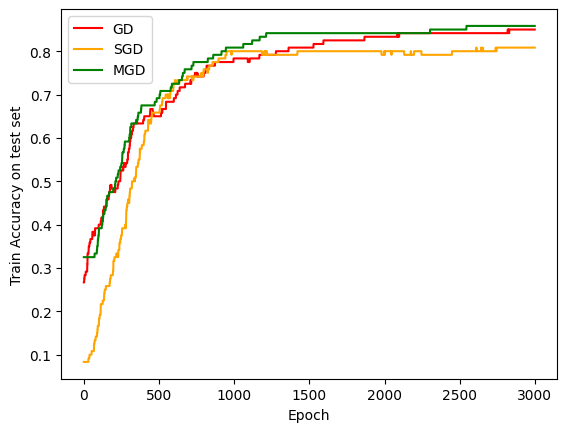

In [153]:
### COMPLETETHE FOLLOWING CELL
epochs = 3000

#Training the models with GD, SGD or mini-batch GD
### GD (lowest)
batch_size = len(X_train)
W_GD = logisticGD(X_train, Y_train, batch_size = batch_size, epochs = epochs, tol = 1e-5, l_rate = 0.001, plot_color='red', name="GD")

## SGD (highest)
batch_size = 1
W_SGD = logisticGD(X_train, Y_train, batch_size = batch_size, epochs = epochs, tol = 1e-5, l_rate = 0.001, plot_color='orange', name="SGD")

## Mini batch GD (middle)
batch_size = X_train.shape[1] // 5
W_MGD = logisticGD(X_train, Y_train, batch_size = batch_size, epochs = epochs, tol = 1e-5, l_rate = 0.001, plot_color='green', name="MGD")

In [154]:
# Calculate accuracy on the training set
Y_train_pred = softmax(W_GD @ (X_train))
train_predictions = np.argmax(Y_train_pred, axis=0)
train_true = np.argmax(Y_train, axis = 0)
train_accuracy = np.mean(train_predictions == train_true)
print("Training Accuracy GD:", train_accuracy)

# Calculate accuracy on the test set
Y_test_pred = softmax(W_GD @ (X_test))
test_predictions = np.argmax(Y_test_pred, axis=0)
test_true = np.argmax(Y_test, axis = 0)
test_accuracy = np.mean(test_predictions == test_true)
print("Test Accuracy GD:", test_accuracy)

print("---")

# Calculate accuracy on the training set
Y_train_pred = softmax(W_SGD @ (X_train))
train_predictions = np.argmax(Y_train_pred, axis=0)
train_true = np.argmax(Y_train, axis = 0)
train_accuracy = np.mean(train_predictions == train_true)
print("Training Accuracy SGD:", train_accuracy)

# Calculate accuracy on the test set
Y_test_pred = softmax(W_SGD @ (X_test))
test_predictions = np.argmax(Y_test_pred, axis=0)
test_true = np.argmax(Y_test, axis = 0)
test_accuracy = np.mean(test_predictions == test_true)
print("Test Accuracy SGD:", test_accuracy)

print("---")

# Calculate accuracy on the training set
Y_train_pred = softmax(W_MGD @ (X_train))
train_predictions = np.argmax(Y_train_pred, axis=0)
train_true = np.argmax(Y_train, axis = 0)
train_accuracy = np.mean(train_predictions == train_true)
print("Training Accuracy mini batch GD:", train_accuracy)

# Calculate accuracy on the test set
Y_test_pred = softmax(W_MGD @ (X_test))
test_predictions = np.argmax(Y_test_pred, axis=0)
test_true = np.argmax(Y_test, axis = 0)
test_accuracy = np.mean(test_predictions == test_true)
print("Test Accuracy mini batch GD:", test_accuracy)

Training Accuracy GD: 0.85
Test Accuracy GD: 0.7
---
Training Accuracy SGD: 0.8083333333333333
Test Accuracy SGD: 0.7
---
Training Accuracy mini batch GD: 0.8583333333333333
Test Accuracy mini batch GD: 0.7
